# Countries Gdp Project

We have 'Countries of The World' data set (from kaggle: Fernando Lasso: https://www.kaggle.com/fernandol/countries-of-the-world).

This dataset have each country as a data point (227 countries in total), and for each, we have 20 columns, each column represents a different aspect or measure of the specific country. 

The goal of the project is to understand this dataset, get some insights from it, and finally to train a model that can predict GDP per capita for each country. 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Import

In [12]:
df = pd.read_csv('countries of the world.csv')

## Data Description

In [13]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


##### Data information

In [14]:
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Here we see an issue; except for 'Country' and 'Region', all other columns are numerical, yet only 'Population', 'Area', and 'GDP' are float/int type; while the rest (15/20) are identified as object type. We need to convert those into float type to continue our data analysis.

##### Fix column names

Many columns in the dataset have long names, we will change them to be shorter and better descriptive.

In [16]:
df.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

##### Fix data types

Many columns in that dataset have _object_ as type. We will fix this by assigning float/string types to them. 

In [17]:
df.country = df.country.astype('category')

df.region = df.region.astype('category')

df.density = df.density.astype(str)
df.density = df.density.str.replace(",",".").astype(float)

df.coastline_area_ratio = df.coastline_area_ratio.astype(str)
df.coastline_area_ratio = df.coastline_area_ratio.str.replace(",",".").astype(float)

df.net_migration = df.net_migration.astype(str)
df.net_migration = df.net_migration.str.replace(",",".").astype(float)

df.infant_mortality = df.infant_mortality.astype(str)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)

df.literacy = df.literacy.astype(str)
df.literacy = df.literacy.str.replace(",",".").astype(float)

df.phones = df.phones.astype(str)
df.phones = df.phones.str.replace(",",".").astype(float)

df.arable = df.arable.astype(str)
df.arable = df.arable.str.replace(",",".").astype(float)

df.crops = df.crops.astype(str)
df.crops = df.crops.str.replace(",",".").astype(float)

df.other = df.other.astype(str)
df.other = df.other.str.replace(",",".").astype(float)

df.climate = df.climate.astype(str)
df.climate = df.climate.str.replace(",",".").astype(float)

df.birthrate = df.birthrate.astype(str)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)

df.deathrate = df.deathrate.astype(str)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)

df.agriculture = df.agriculture.astype(str)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)

df.industry = df.industry.astype(str)
df.industry = df.industry.str.replace(",",".").astype(float)

df.service = df.service.astype(str)
df.service = df.service.str.replace(",",".").astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

Now that looks good.

##### Show statistical analysis of our data set

In [19]:
df.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


##### Show if there are missing data points

In [20]:
print(df.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1, 'Missing Data')]

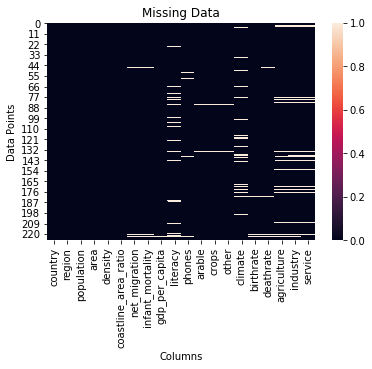

In [21]:
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

We can see from above that we have some missing data points, but it is not extensive. 14/20 of our columns have missing data points, the maximum percentage of missing data is in the 'Climate' column, and it is less than 10% (22/227).

Later in the project we will deal with these missing data points, in the data cleaning section.

##### Data Validity Check

In order to have more certainty, we will pick a few countries and attributes (features) in random, and we will do some internet research to make sure the values in our data set is not totally wrong.

Countries to check: India(Home land), Brazil, Cuba, Italy, Libya. The features we will check are: (p)opulation, (a)rea, (c)oastline/Area ratio, and (G)DP Source of information: https://www.jetpunk.com/info/countries-by-coastline, https://en.wikipedia.org/

From those sources:

1. India: (p)1,210,854,977 (a)3,287,263 (c) 11,000	 (G) 2,338
2. Brazil: (p)210,147,125 (a)3,287,956 (c)0.0035 (G)17,016
3. Cuba: (p)011,209,628 (a)00042,426 (c)0.0842 (G)08,822
4. Italy: (p)060,317,116 (a)00116,350 (c)0.0321 (G)40,470
5. Libya: (p)006,871,292 (a)00679,363 (c)0.0016 (G)07,803

Now let's compare those values to the ones we have in our data set:

In [22]:
df[df['country'] == 'Cuba']

,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service


In [23]:
df.loc[[94,27,51, 101, 118], ['country', 'population', 'area', 'coastline_area_ratio', 'gdp_per_capita']]

,country,population,area,coastline_area_ratio,gdp_per_capita
94,India,1095351995,3287590,0.21,2900.0
27,Brazil,188078227,8511965,0.09,7600.0
51,Cuba,11382820,110860,3.37,2900.0
101,Italy,58133509,301230,2.52,26700.0
118,Libya,5900754,1759540,0.10,6400.0


From this quick inspection above, we can see that our data set is a bit old. GDP and Population are a few years old (not updated), while the area and coastline ratio are actually in Km and not miles as mentioned in the column names.

##### Investigating undefined features

We need to understand what different values in the Climate, agriculture, industry, and service columns refer to.

In [24]:
df.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


It is clear here that the values in (agriculture, industry, and service) columns are the percentages those different sectors in the economic activity in each country.
For example: agriculture is generating 38% of Afganistan's GDP, industry generates 24%, while service generates 38%; the total is 100%.

Now we still have to understand the climate column, let's continue our investigation:

In [25]:
df.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [26]:
h1 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1].head()
h2 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2].head()
h3 = df.loc[:, ['country', 'region', 'climate']][df.climate == 3].head()
h4 = df.loc[:, ['country', 'region', 'climate']][df.climate == 4].head()
h5 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1.5].head()
h6 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


So, along with nan (representing missing data), climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. our observations:

1. Countries with mostly desert/hot climate have 1
2. Countries with mostly tropical climate have 2
3. Countries with mostly cold/cool Climate have 3
4. Countries with Climate almost equally divided between hot and tropical have 1.5
5. Countries with Climate almost equally divided between cold and tropical have 2.5
6. Countries under 'Climate' = 4, are also belonging to cold/cool climate group; It is not mentioned in the dataset source why this group is separate from group 3 ; yet we will combine both groups together in the data cleaning section of the project.
7. There are 22 countries with null values for the climate column, those will be replaces by 0 in a later step, where 0 will represent 'unknown' value.

## Data Cleaning

##### Missing Data

In [27]:
print(df.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


1. net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
2. infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
3. gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set. 
4. literacy: 18 missing values, replaces by the mean literacy of each missing value's region.
5. phones: 4 missing values, replaces by the mean phones of each missing value's region.
6. arable, crops, and other: 2 missing values of very small islands, replace with zero.
7. climate: 22 missing, replace with 0, where zero will represent a 'unknown' value. 
8. birthrate, and death rate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related. 
9. agriculture, industry, and service: 15 missing values, all belong to very small island nations. After inspection for similar nations, we found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with the following: agriculture = 0.15, industry = 0.05. service = 0.8. 

In [28]:
df['net_migration'].fillna(0, inplace=True)
df['infant_mortality'].fillna(0, inplace=True)
df['gdp_per_capita'].fillna(2500, inplace=True)
df['literacy'].fillna(df.groupby('region')['literacy'].transform('mean'), inplace= True)
df['phones'].fillna(df.groupby('region')['phones'].transform('mean'), inplace= True)
df['arable'].fillna(0, inplace=True)
df['crops'].fillna(0, inplace=True)
df['other'].fillna(0, inplace=True)
df['climate'].fillna(0, inplace=True)
df['birthrate'].fillna(df.groupby('region')['birthrate'].transform('mean'), inplace= True)
df['deathrate'].fillna(df.groupby('region')['deathrate'].transform('mean'), inplace= True)
df['agriculture'].fillna(0.17, inplace=True)
df['service'].fillna(0.8, inplace=True)
df['industry'].fillna((1 - df['agriculture'] - df['service']), inplace= True)

Let's check our missing data if any: 

In [29]:
print(df.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


No missing data any more.

## EDA

##### Correlation heatmap

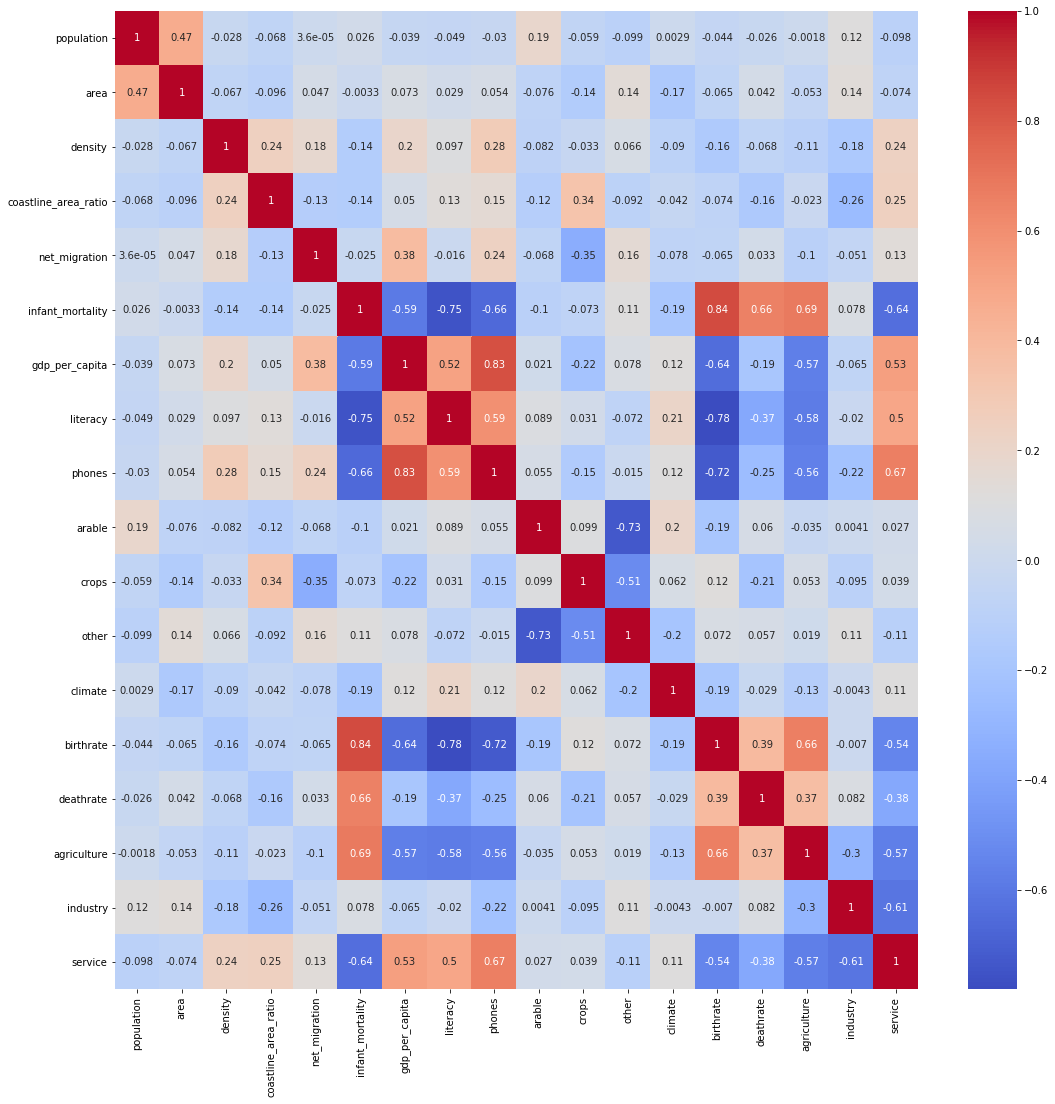

In [30]:
fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')


Some insights from the above correlation heatmap: 
1. expected strong correlation between infant_mortality and birthrate
2. unexpected strong correlation between infant_mortality and agriculture
3. expected strong correlation between infant_mortality and literacy
4. expected strong correlation between gdp_per_capita and phones
5. expected strong correlation between arable and other (other than crops) 
6. expected strong correlation between birthrate and literacy (the less literacy the higher the birthrate) 
7. unexpected strong correlation between birthrate and phones

let's now show correlation among a few of our features

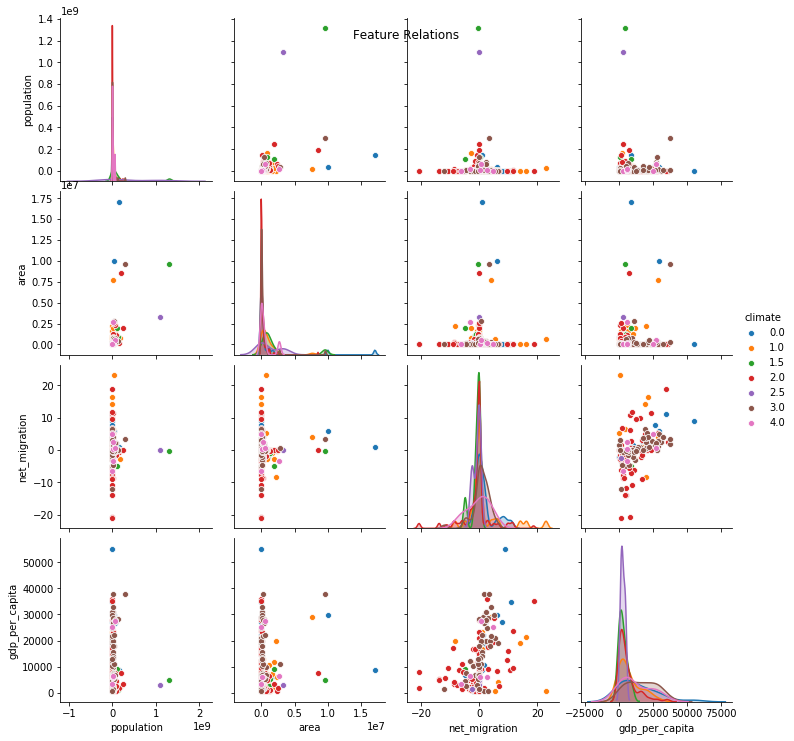

In [31]:
g = sns.pairplot(df[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita.

##### Regional Analysis

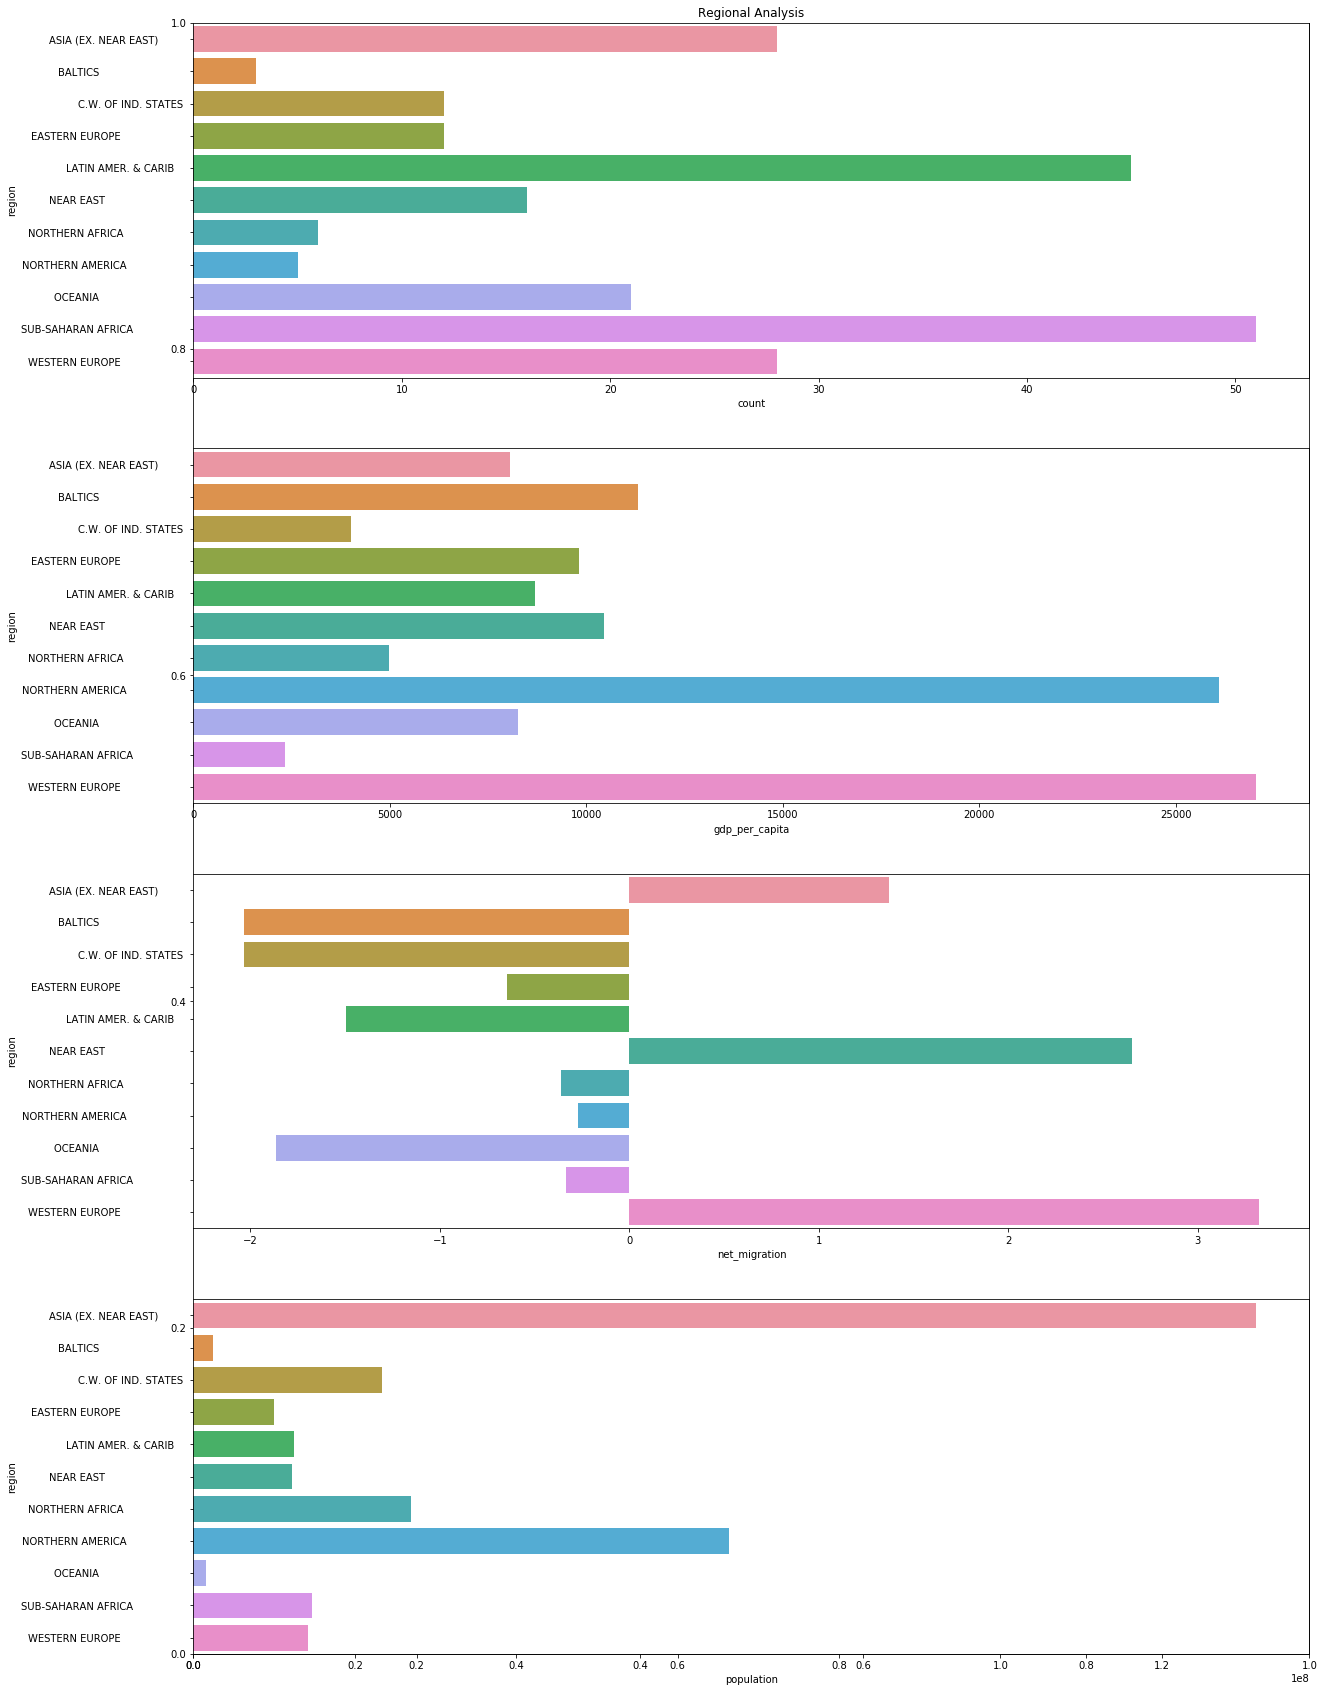

In [32]:
fig = plt.figure(figsize=(20, 30))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= df, y= 'region', ax= ax1)
sns.barplot(data= df, y= 'region', x= 'gdp_per_capita', ax= ax2, ci= None)
sns.barplot(data= df, y= 'region', x= 'net_migration', ax= ax3, ci= None)
sns.barplot(data= df, y= 'region', x= 'population', ax= ax4, ci= None)
plt.show()

From the above figures, we can notice the following: 

1. Sub-Saharian Africa and Latin America regions have the most countries whithen them. 
2. Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
3. Asia, North America, and North Europe, are the main regions where migrants from other regions go. 
4. Asia has the largest population, Oceania has the smallest. 

##### GDP Analysis

The figure below shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

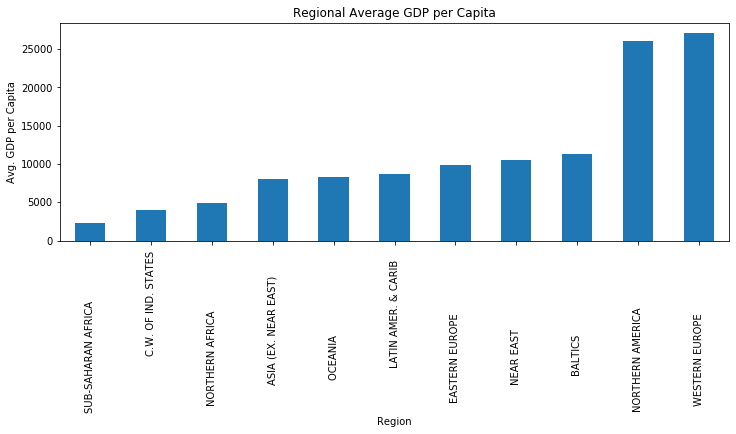

In [33]:
fig = plt.figure(figsize=(12, 4))
df.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

<Figure size 864x864 with 0 Axes>

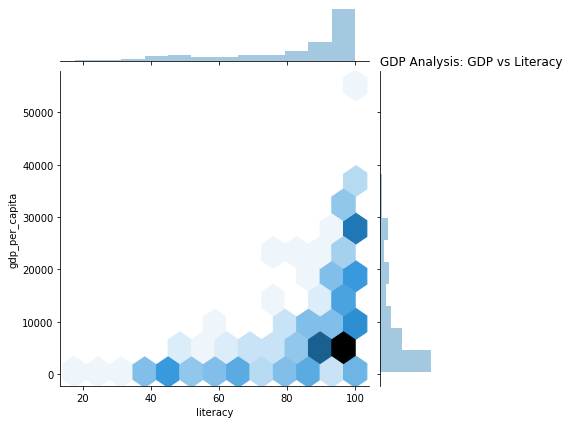

In [34]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= df, x= 'literacy', y= 'gdp_per_capita', kind= 'hex')
plt.title('GDP Analysis: GDP vs Literacy', loc='left')
plt.show()


From the above figure, it is clear that the higher the country's GDP, the more literate the population is, and vice versa

<Figure size 864x864 with 0 Axes>

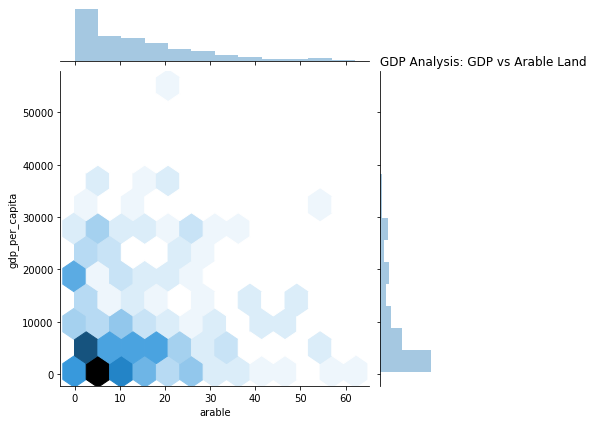

In [35]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= df, x= 'arable', y= 'gdp_per_capita', kind= 'hex')
plt.title('GDP Analysis: GDP vs Arable Land', loc='left')
plt.show()

No clear relationship between GDP and percentage of arable land, an indication that agriculture is not the strongest factor economically, as it used to be for the most of the human history in the last 60000 years.

<Figure size 864x864 with 0 Axes>

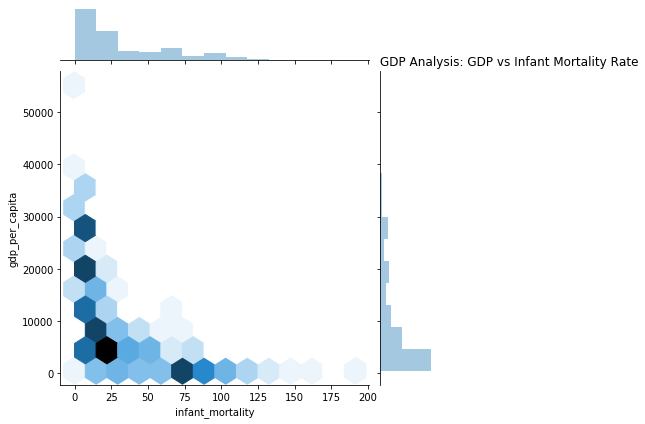

In [36]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= df, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'hex')
plt.title('GDP Analysis: GDP vs Infant Mortality Rate', loc='left')
plt.show()

from the figure above, it is very clear that poor countries suffer more from infant mortality.

## Data Pre-Conditioning

In this section we will make our data ready for model training. This will include: 
1. Transform 'region' column into numerical values. 
2. Split data set into training and testing parts (80/20), while dropping the countries column (string, and not going to be used to train the models), and separating gdp_per_capita column, where it will be used as labels. 
3. We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

##### Region Transform

In [37]:
df_final = pd.concat([df,pd.get_dummies(df['region'], prefix='region')], axis=1).drop(['region'],axis=1)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

In [40]:
df_final.to_csv('prediction.csv')